# Assignment 1 - Question 3
The objective of this assignment is to get you familiarize with  the  problem  of  `Linear Regression`.

## Instructions
- Write your code and analysis in the indicated cells.
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Do not attempt to change the contents of other cells.
- No inbuilt functions to be used until specified.

## Submission
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Rename the notebook to `<roll_number>_A1_Q3.ipynb`.

## 1.3.0 Background about the dataset

TLDR: You have 25 independent variables (`x1, x2, x3, ... , x25`) type: `float` for each data point. You can use a linear combination of these 25 independent variables to predict the y (dependent variable) of each data point.

In [1]:
import numpy as np
import csv
import pandas as pd
import matplotlib.pyplot as plt


%matplotlib inline

In [2]:
train_data = list()
with open('train_q3.csv', 'r') as infile:
    input_rows = csv.DictReader(infile)
    for row in input_rows:
        data_point = ([float(row['x1']), float(row['x2']), float(row['x3']),
                       float(row['x4']), float(row['x5']), float(row['x6']),
                        float(row['x7']), float(row['x8']), float(row['x9']),
                        float(row['x10']), float(row['x11']), float(row['x12']),
                        float(row['x13']), float(row['x14']), float(row['x15']),
                        float(row['x16']), float(row['x17']), float(row['x18']),
                        float(row['x19']), float(row['x20']), float(row['x21']),
                        float(row['x22']), float(row['x23']), float(row['x24']),
                        float(row['x25'])], float(row['y']))
        train_data.append(data_point)
        
# each point in x_train has 25 values - 1 for each feature
X_train = [x[0] for x in train_data]
# each point in y_train has 1 value - the 'y' of the molecule
y_train = [x[1] for x in train_data]


test_data = list()
with open('test_q3.csv', 'r') as infile:
    input_rows = csv.DictReader(infile)
    for row in input_rows:
        data_point = ([float(row['x1']), float(row['x2']), float(row['x3']),
                        float(row['x4']), float(row['x5']), float(row['x6']),
                        float(row['x7']), float(row['x8']), float(row['x9']),
                        float(row['x10']), float(row['x11']), float(row['x12']),
                        float(row['x13']), float(row['x14']), float(row['x15']),
                        float(row['x16']), float(row['x17']), float(row['x18']),
                        float(row['x19']), float(row['x20']), float(row['x21']),
                        float(row['x22']), float(row['x23']), float(row['x24']),
                        float(row['x25'])], float(row['y']))
        test_data.append(data_point)

X_test = [x[0] for x in test_data]
y_test = [x[1] for x in test_data]

### 1.3.1 Implement a Linear Regression model that minimizes the MSE **without using any libraries**. You may use NumPy to vectorize your code, but *do not use numpy.polyfit* or anything similar.

1.3.1.1 Explain how you plan to implement Linear Regression in 5-10 lines.

1.3.1.2 Implement Linear Regression using `x_train` and `y_train` as the train dataset.

1.3.2.3 Choose the best learning rate and print the learning rate for which you achieved the best MSE.

1.2.1.4 Make a [Parity Plot](https://en.wikipedia.org/wiki/Parity_plot) of your model's bandgap predictions on the test set with the actual values.

- Initially take w or coefficients array of size=number of features in dataset and intercept term b.
- Predict y values using above coefficient array then calculate loss=predicted values-actual values.
- For every iteration of gradient descent cost will decrease as we are finding new w and b for each time and our     model gets closer and closer to the best fit line.
- Finally we will get w and b with the help of we can predict X_test.
- Here our goal is to find an optimum number called a weight or coefficient for each feature so that the model can   predict accurately.

In [3]:
def CostFunction(X,y,w,b):
    predicted=X.dot(w) + b
    actual=y
    n=len(y)
    cost = np.sum(((predicted - actual) ** 2) / (2*n))
    return cost

def GradientDescent(X, y, w, b, learning_rate, NumberOfIterations):
    cost_list = np.zeros(NumberOfIterations)

   
    for itr in range(NumberOfIterations):
        z = X.dot(w) + b#predicted
        loss = z - y#loss=predicted-actual
        n = len(y)
        
        weight_gradient = X.T.dot(loss) / n
        bias_gradient = np.sum(loss) / n
        
        #shifting towards global minima
        w = w - learning_rate*weight_gradient#w updated value
        b = b - learning_rate*bias_gradient#b updated value
  
        cost = CostFunction(X, y, w, b)
        cost_list[itr] = cost

        if itr%1000==0:
            print("Cost is:",cost)
        
    return w, b, cost_list



def plotGraph(y_test, y_pred):
    fig, ax = plt.subplots(figsize=(7,7))

    ax.scatter(y_test, y_pred)

    lims = [
        np.min([ax.get_xlim(), ax.get_ylim()]),
        np.max([ax.get_xlim(), ax.get_ylim()]),
    ]
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    ax.set_aspect('equal')
    ax.set_xlim(lims)
    ax.set_ylim(lims)

    ax.set_title('Parity Plot of Custom Linear Regression')
    ax.set_xlabel('Ground truth y-values')
    ax.set_ylabel('Predicted y-values')
    plt.show()

def predict(X, w, b):
    return X.dot(w) + b


def meanSquareError(y_pred,y):
    n= len(y)
    error=(y_pred-y).dot((y_pred-y).T)
    error=error/n
    return error


In [4]:
learning_rate= 0.02
NumberOfIterations=15000
X_train=pd.DataFrame(X_train)
w, b, c= GradientDescent(X_train, y_train, np.zeros(X_train.shape[1]), 0,learning_rate,NumberOfIterations)

Cost is: 3.0233003497379176
Cost is: 0.020384314420373695
Cost is: 0.008078859437135114
Cost is: 0.0051626743539875015
Cost is: 0.0037561303719232057
Cost is: 0.002889943803792084
Cost is: 0.0022790183681052102
Cost is: 0.0018223992435291063
Cost is: 0.0014735670258378467
Cost is: 0.0012049074433057934
Cost is: 0.000997302815668156
Cost is: 0.0008365843202745813
Cost is: 0.0007119768040426118
Cost is: 0.0006152107285942169
Cost is: 0.0005399193902192385


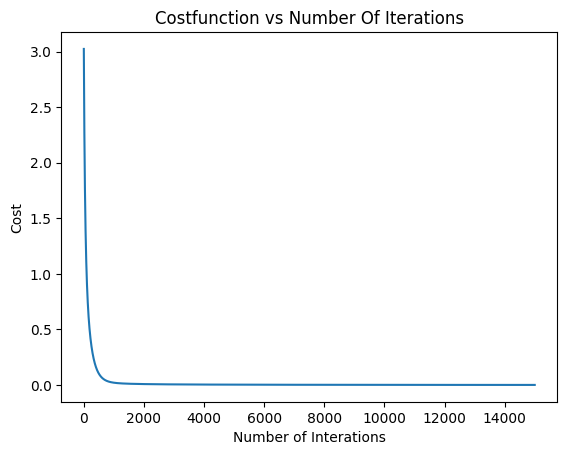

In [5]:
NumberOfIterations=np.arange(1,len(c)+1)
plt.title('Costfunction vs Number Of Iterations')
plt.plot(NumberOfIterations, c)

plt.xlabel('Number of Interations')
plt.ylabel('Cost')
plt.show()

mean square error is  0.0015740720378961534


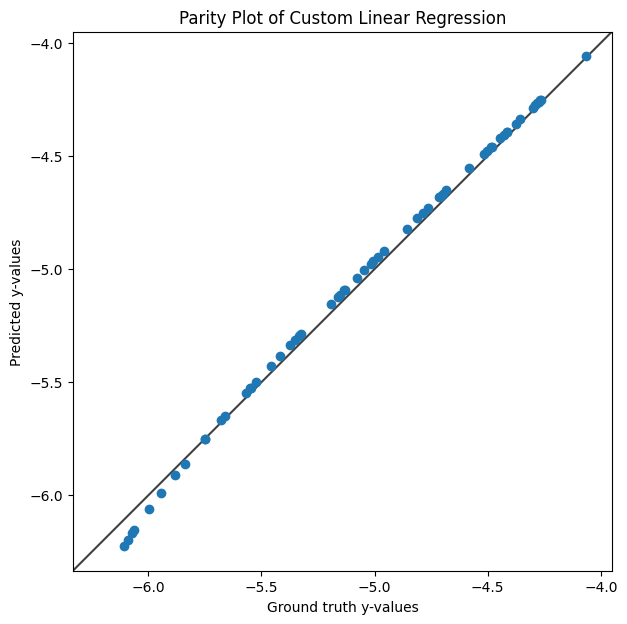

In [6]:

X_test=np.array(X_test)
y_test=np.array(y_test).ravel()
y_pred = predict(X_test, w, b)

print("mean square error is ",meanSquareError(y_pred,y_test))
plotGraph(y_test,y_pred)



Cost is: 3.0499474757756406
Cost is: 0.10221449525840554
Cost is: 0.020423730761801578
Cost is: 0.011204760050209678
Cost is: 0.008082308767161948
Cost is: 0.006312000748503747
Cost is: 0.005164118316065775
Cost is: 0.004359481428235603
Cost is: 0.0037569085685572367
Cost is: 0.0032810550586682427
Cost is: 0.0028904525197998043
Cost is: 0.00256135009283397
Cost is: 0.00227939306485926
Cost is: 0.0020353144974276515
Cost is: 0.0018226909543408213
Cost is: 0.0016367619600270737
Cost is: 0.00147379909239146
Cost is: 0.0013307603155200411
Cost is: 0.001205093423204995
Cost is: 0.0010946183710409008
Cost is: 0.0009974521561323427
Cost is: 0.0009119573354125653
Cost is: 0.0008367042548741014
Cost is: 0.0007704417003534172
Cost is: 0.0007120730855735107


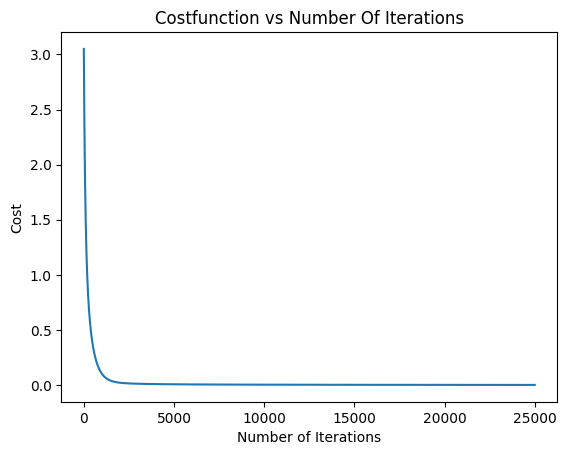

In [7]:
learning_rate= 0.01
NumberOfIterations=25000


w, b, c= GradientDescent(X_train, y_train, np.zeros(X_train.shape[1]), 0,learning_rate,NumberOfIterations)

NumberOfIterations=np.arange(1,len(c)+1)
plt.title('Costfunction vs Number Of Iterations')
plt.plot(NumberOfIterations, c)

plt.xlabel('Number of Iterations')
plt.ylabel('Cost')
plt.show()




mean square error is  0.00326574858939975


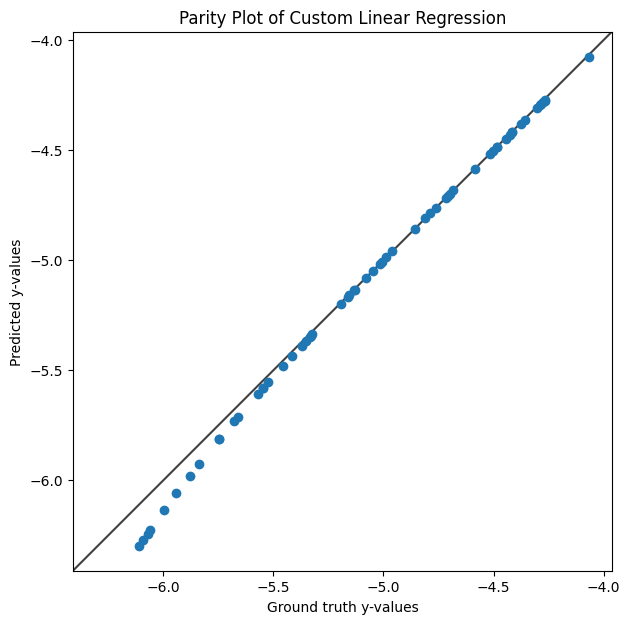

In [8]:

y_pred = predict(X_test, w, b)

print("mean square error is ",meanSquareError(y_pred,y_test))
plotGraph(y_test, y_pred)

### 1.3.2 Implement Ridge Regression

1.3.2.1 Explain Ridge regression briefly in 1-2 lines.

1.3.2.2 Implement Ridge regression and make a table of different RMSE scores you achieved with different values of alpha. What does the parameter `alpha` do?

1.3.2.3 How does it affect the results here? Explain in 5-10 lines in total. (You can use scikit-learn from this cell onwards)

1.3.2.4 Make a Parity Plot of Ridge Regression model's y-predictions on the test set with the actual values.

- Linear Regression with L2 regularization is called Ridge regression.
- Here loss function is modified to minimize the complexity of the model by adding a penalty parameter that is equal to the square of the magnitude of the coefficients.

In [9]:
# 1.3.2.2
# you should not have imported sklearn before this point
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt
# implement Ridge regression and make a table where you explore the effect of different values of `alpha`

<!-- Your answer to 1.3.2.3 -->
`1.3.2.3 Answer`

In [10]:
def ridge(alpha):
    rr = Ridge(alpha)
    rr.fit(X_train, y_train) 
    pred_test_rr= rr.predict(X_test)
    rmse=np.sqrt(mean_squared_error(y_test,pred_test_rr))
    return pred_test_rr,rmse

y_pred,error =ridge(0.6)
print("error is ",error)


error is  0.06174704655453445


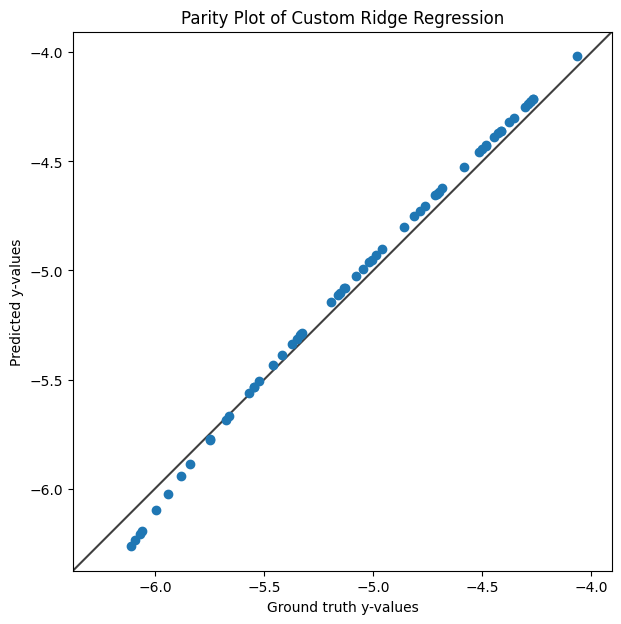

In [11]:
fig, ax = plt.subplots(figsize=(7,7))

ax.scatter(y_test, y_pred)

lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),
    np.max([ax.get_xlim(), ax.get_ylim()]),
]
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)

ax.set_title('Parity Plot of Custom Ridge Regression')
ax.set_xlabel('Ground truth y-values')
ax.set_ylabel('Predicted y-values')
plt.show()

In [12]:
alphaValues=[1e-15,1e-10,0.0001,0.001,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.1,1,5,15]

for a in alphaValues:
    pred_test_rr,error=ridge(a)
    print("for alpha ",a," RMSE error is ",error)
    

for alpha  1e-15  RMSE error is  2.6315869380922048e-05
for alpha  1e-10  RMSE error is  0.0017760514722371388
for alpha  0.0001  RMSE error is  0.1461433202405544
for alpha  0.001  RMSE error is  0.07406137815511453
for alpha  0.01  RMSE error is  0.30738707982897123
for alpha  0.02  RMSE error is  0.28284048303600173
for alpha  0.03  RMSE error is  0.24719544635561208
for alpha  0.04  RMSE error is  0.21522986527356783
for alpha  0.05  RMSE error is  0.1883462356988914
for alpha  0.06  RMSE error is  0.16606210516965422
for alpha  0.07  RMSE error is  0.1476401624863209
for alpha  0.08  RMSE error is  0.13240457464623395
for alpha  0.1  RMSE error is  0.10934861996823576
for alpha  1  RMSE error is  0.07087132528643121
for alpha  5  RMSE error is  0.36202027321730723
for alpha  15  RMSE error is  1.1562861336329888



- Alpha is the parameter which balances the priority given to minimizing error vs minimizing sum of square of coefficients.
- With the increase in alpha value the model complexity reduces.
- High alpha values can lead to significant underfitting.
- For alpha=15 error is high.

### 1.3.3 Implement Lasso Regression
1.3.3.1 Explain Lasso regression briefly in 1-2 lines.

1.3.3.2 Implement Lasso regression and make a table of different RMSE scores you achieved with different values of alpha.

1.3.3.3 What does the parameter `alpha` do? How does it affect the results here? Explain in 5-10 lines in total.

1.3.3.4 Make a Parity Plot of Lasso Regression model's y-predictions on the test set with the actual values.

- Linear regression with L1 regularization is called Lasso regression.
- The loss function is modified to minimize the complexity of the model by limiting the sum of the absolute values of the model coefficients (also called the l1-norm).
- It is used so that our model is not overfit to corrupted train data and keep the weights in check.

In [13]:
def lasso(alpha):
    model_lasso = Lasso(alpha)
    model_lasso.fit(X_train, y_train) 
    pred_test_lasso= model_lasso.predict(X_test)
    rmse=np.sqrt(mean_squared_error(y_test,pred_test_lasso))
    return pred_test_lasso,rmse



y_pred,error=lasso(0.01)
print("error is ",error)


error is  0.042419962550167126


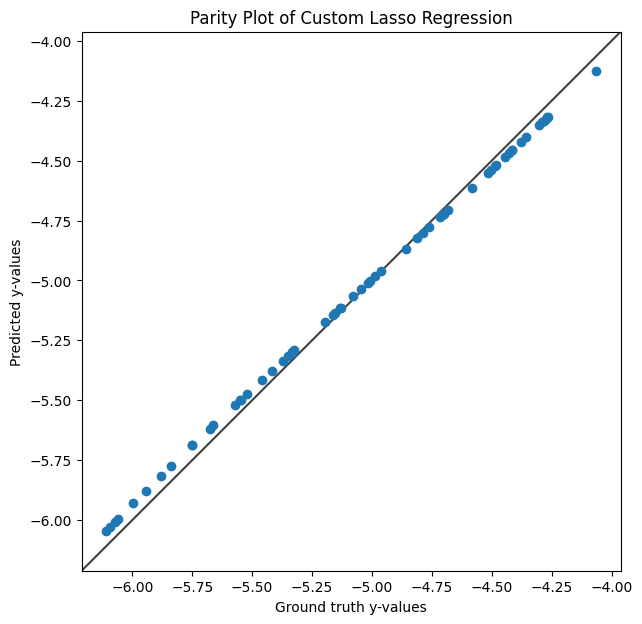

In [14]:
fig, ax = plt.subplots(figsize=(7,7))

ax.scatter(y_test, y_pred)

lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),
    np.max([ax.get_xlim(), ax.get_ylim()]),
]
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)

ax.set_title('Parity Plot of Custom Lasso Regression')
ax.set_xlabel('Ground truth y-values')
ax.set_ylabel('Predicted y-values')
plt.show()

In [15]:
alphaValues=[1e-15,1e-10,0.0001,0.001,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.1,1,5]

for a in alphaValues:
    y_pred,error=lasso(a)
    print("for alpha ",a," RMSE error is ",error)
    


for alpha  1e-15  RMSE error is  0.31378609876111613
for alpha  1e-10  RMSE error is  0.3137829860387678
for alpha  0.0001  RMSE error is  0.6124899982744807
for alpha  0.001  RMSE error is  0.1796673284732289
for alpha  0.01  RMSE error is  0.042419962550167126
for alpha  0.02  RMSE error is  0.08452169680014833
for alpha  0.03  RMSE error is  0.12185681492530823
for alpha  0.04  RMSE error is  0.1619562603247429
for alpha  0.05  RMSE error is  0.20318995539612816
for alpha  0.06  RMSE error is  0.2449858495714705
for alpha  0.07  RMSE error is  0.2870985123742389
for alpha  0.08  RMSE error is  0.32940647523328326
for alpha  0.1  RMSE error is  0.41436880742215176
for alpha  1  RMSE error is  4.269928072334982
for alpha  5  RMSE error is  4.996771333559856


<!-- 
alpha=0.001,RMSE=0.1796673284732289
alpha=0.005,RMSE=0.4106209323115593
alpha =0.01, RMSE=0.042419962550167126
alpha= 0.02, RMSE=0.08452169680014833
alpha=0.03,RMSE=0.12185681492530823
alpha=0.04,RMSE=0.1619562603247429
alpha=0.05,RMSE=0.20318995539612816
alpha=1.5,RMSE=4.996771333559856

Alpha is the parameter which balances the priority given to minimizing error vs magnitude of coefficients.
With the increase in alpha value,RMSE is increasing and the model complexity reduces.It helps us to reduce overfitting.
If it increase significantly can cause underfitting as well.For alpha =1.5 RMSE is increased rapidly.
For the same alpha, lasso has is poorer fit as compared to ridge regression.


 -->


- Alpha provides a trade-off between balancing error and magnitude of coefficients.
- As the alpha increases error also increases
- For the same values of alpha, the coefficients of lasso regression are much smaller as compared to that of ridge regression.
- For the same alpha, lasso is poorer fit as compared to ridge regression.